In [31]:
url = "https://api.binance.com/api/v3/ticker/price"
# C++ include <>
import requests
response = requests.get(url, params={"symbol": "BTCUSDT"})
print(response.content)
print(response.json(), type(response.json()))
price = float(response.json()['price'])
print("BTC-USDT:", price)

b'{"symbol":"BTCUSDT","price":"104861.43000000"}'
{'symbol': 'BTCUSDT', 'price': '104861.43000000'} <class 'dict'>
BTC-USDT: 104861.43


# Dict Usage

Dict 基本上是一個 key-value pair 的資料結構。

## 性質
- **無序**（Python 3.7+ 實作上維持插入順序）  
- **可變**（Mutable）：可新增、修改、刪除  
- **Key 唯一且~~可 hash~~**，Value 無限制  
- **查找/插入平均** O(1)

## 語法
```python
# 建立
d = {}                     # 空 dict
d = {'a': 1, 'b': 2}       # 初始化

# 新增 / 修改
d['c'] = 3                 # {'a':1,'b':2,'c':3}

# 取值
x = d['a']                 # 1
y = d.get('x')             # None，key 不存在不報錯
y = d.get('x', 0)          # 0，提供預設值

# 刪除
del d['b']                 # {'a':1,'c':3}
v = d.pop('c')             # v = 3

# 其他常用
keys = d.keys()            # dict_keys(['a'])
vals = d.values()          # dict_values([1])
items = d.items()          # dict_items([('a',1)])
for k, v in d.items():
    print(k, v)


In [32]:
# Mutable
L = [1, 2, 3]
L[1] = 5
print(L)
# Immutable
T = (1, 2, 3)
# T[1] = 5
print(T)


[1, 5, 3]
(1, 2, 3)


In [33]:
# Dict Example
import random
random.seed(7122)
L = [random.randint(1, 5) for _ in range(10)]
# [5, 4, 2, 2, 2, 5, 3, 2, 2, 4] -> {2: 4, 3: 1, 4: 2, 5: 3}
count_dict = {}
for number in L:
    if number in count_dict:
        count_dict[number] += 1
    else:
        count_dict[number] = 1


print(L)
print(count_dict)

[5, 4, 2, 2, 2, 5, 3, 2, 2, 4]
{5: 2, 4: 2, 2: 5, 3: 1}


# 5/15 作業
根據 binance 的 price list，以及篩選的 filter_list，做出以下的dict。
舉例來說，`filter_list = ["BTCUSDT", "ETHUSDT", "ETHBTC"]`
那麼結果 result 應該要是
```python
{
    "BTCUSDT": ...,
    "ETHUSDT": ...,
    "ETHBTC": ...,
}
```

In [34]:
# 作業: 
url = "https://api.binance.com/api/v3/ticker/price"
# C++ include <>
import requests
response = requests.get(url)
print(response)
price_list = response.json()
filter_list = ["BTCUSDT", "ETHUSDT", "ETHBTC",]
result = {}
for item in price_list:
    if item["symbol"] in filter_list:
        result[item["symbol"]] = float(item["price"])
print(result)

# 結果要是 

<Response [200]>
{'ETHBTC': 0.02485, 'BTCUSDT': 104861.42, 'ETHUSDT': 2606.43}


# List 的操作

* 宣告空的 list: `L = []`
* 一開始裡面有東西: `L = [1, '2', 3.0]`
* 把一個東西放在 L 的屁股: `L.append(elem)`
  * 等價於 C++ 的 vector 的 `V.push_back(elem)`

In [35]:
L = [1]
L.append(12)
print(L)

[1, 12]


In [36]:
url = "https://api.binance.com/api/v3/klines"
import requests
# parameters : 參數
# interval : 區間
klines_1m = requests.get(url, params={"symbol": "BTCUSDT", "interval": "1m"}).json()
from pprint import pprint
'''
  [
    1499040000000,      // Kline open time
    "0.01634790",       // Open price
    "0.80000000",       // High price
    "0.01575800",       // Low price
    "0.01577100",       // Close price
    "148976.11427815",  // Volume
    1499644799999,      // Kline Close time
    "2434.19055334",    // Quote asset volume
    308,                // Number of trades
    "1756.87402397",    // Taker buy base asset volume
    "28.46694368",      // Taker buy quote asset volume
    "0"                 // Unused field, ignore.
  ]
'''
# Collect open price
import datetime
timestamps = []
open_prices = []
for unit in klines_1m:
    # print(unit)
    ts = unit[0] // 1000
    tz_utc_plus_8 = datetime.timezone(datetime.timedelta(hours=8))
    dt = datetime.datetime.fromtimestamp(ts, tz=tz_utc_plus_8)
    # print(dt, ts, unit[1])


[]
[]


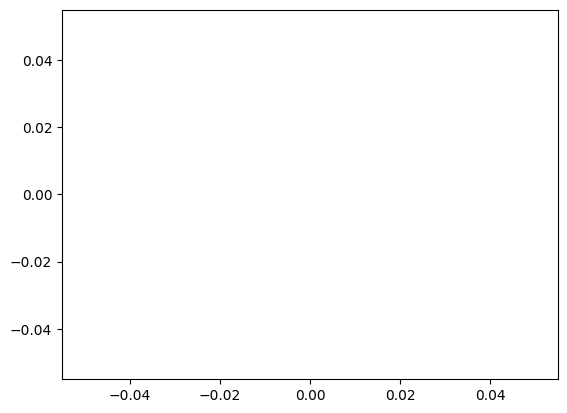

In [37]:
import matplotlib.pyplot as plt
# python -m pip install matplotlib
print(timestamps)
print(open_prices)
plt.plot(timestamps, open_prices)
plt.show()

In [53]:
# 連續的線
cur_endtime = None
timestamps = []
open_prices = []
for _ in range(4):
    if cur_endtime is None:
        klines_1m = requests.get(url, params={"symbol": "BTCUSDT", "interval": "1m"}).json()
    else:
        klines_1m = requests.get(url, params={"symbol": "BTCUSDT", "interval": "1m", "endTime": cur_endtime}).json()

    print(klines_1m[0][0], klines_1m[-1][0])
    for k in (klines_1m)[::-1]:
        timestamps.append(k[0])
        open_prices.append(float(k[1]))
    cur_endtime = str(int(klines_1m[0][0]) - 60 * 1000)
timestamps=timestamps[::-1]
open_prices=open_prices[::-1]
percent_changes = [0]
for i in range(1, len(open_prices)):
    previous = open_prices[i-1]
    current = open_prices[i]
    changes = ((current - previous) / previous)
    percent_changes.append(changes)
# 把連續的k線串起來

1749089520000 1749119460000
1749059520000 1749089460000
1749029520000 1749059460000
1748999520000 1749029460000


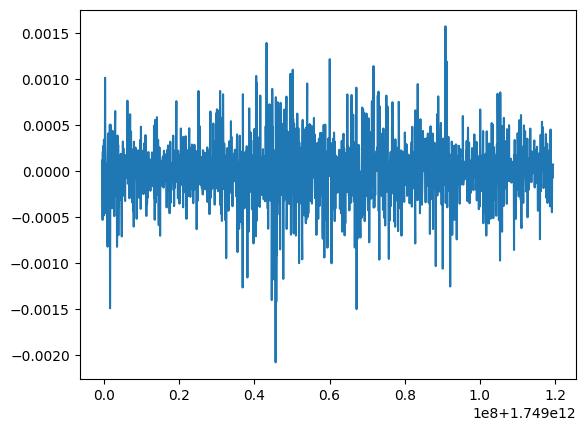

In [55]:
import matplotlib.pyplot as plt
# python -m pip install matplotlib
plt.plot(timestamps, percent_changes)
plt.show()

In [ ]:
from binance.spot import Spot

client = Spot()

# Get server timestamp
print(client.time())
# Get klines of BTCUSDT at 1m interval
print(client.klines("BTCUSDT", "1m"))
# Get last 10 klines of BNBUSDT at 1h interval
print(client.klines("BNBUSDT", "1h", limit=10))

# API key/secret are required for user data endpoints
client = Spot(api_key='<api_key>', api_secret='<api_secret>')

# Get account and balance information
print(client.account())



In [ ]:
import requests

url = "https://api.binance.com/api/v3/depth"
params = {"symbol": "BTCUSDT", "limit": 5}

response = requests.get(url, params=params)
data = response.json()

print("買：")
for bid in data['bids']:
    p, q = bid
    print(f"價格: {p}, 數量: {q}")

print("賣：")
for ask in data['asks']:
    p, q = ask
    print(f"價格: {p}, 數量: {q}")


買：
價格: 107649.34000000, 數量: 5.55259000
價格: 107649.33000000, 數量: 0.00005000
價格: 107649.31000000, 數量: 0.00017000
價格: 107649.30000000, 數量: 0.00005000
價格: 107649.13000000, 數量: 0.00005000
賣：
價格: 107649.35000000, 數量: 0.87954000
價格: 107649.36000000, 數量: 0.04462000
價格: 107649.37000000, 數量: 0.00028000
價格: 107649.77000000, 數量: 0.00005000
價格: 107649.78000000, 數量: 0.00005000
